In [1]:
!pwd
# only run the next line once
%cd './drive/MyDrive/Colab Notebooks/citadel apac/'
!ls

/content
/content/drive/MyDrive/Colab Notebooks/citadel apac
 10-22-filled.csv
 acs_5yr_est_selected_economic_characteristics_2010-2022.csv
 all_commodities.csv
 all_stock_and_etfs.csv
 arkansas_population_data.csv
 california_population_data.csv
 kentucky_population_data.csv
 Meat_Stats_Cold_Storage.csv
 Meat_Stats_Meat_Production.csv
 Meat_Stats_Slaughter_Counts.csv
 Meat_Stats_Slaughter_Weights.csv
 newyork_population_data.csv
 Nutrition_Physical_Activity_and_Obesity_Data.csv
'Physical&Obesity.csv'
 stock_descriptions.csv
'SugarDrinks&Obesity.csv'
 tennessee_population_data.csv
'TV&Obesity.csv'
'Vege&Obesity.csv'


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# dataset on economic characteristics

split into multiple dfs for different characteristics
stored in a dictionary (econ_char_dict)

In [3]:
econ_char_filename = 'acs_5yr_est_selected_economic_characteristics_2010-2022.csv'
df = pd.read_csv(econ_char_filename)
split = [d for _, d in df.groupby(df.eq('Header').any(axis=1).cumsum())]
econ_char_dict = {}
for i in split:
  name = i['Label (Grouping)'].iloc[0]
  econ_char_dict[name] = i.iloc[1:]
for key, value in econ_char_dict.items():
  print(key)


EMPLOYMENT STATUS
COMMUTING TO WORK
OCCUPATION
INDUSTRY
CLASS OF WORKER
INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS)
HEALTH INSURANCE COVERAGE
PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL
INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)
INCOME AND BENEFITS (IN 2013 INFLATION-ADJUSTED DOLLARS)
INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS)
INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)
INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS)
INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)
INCOME AND BENEFITS (IN 2014 INFLATION-ADJUSTED DOLLARS)
INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)
INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)
INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)
INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS)
INCOME AND BENEFITS (IN 2021 INFLATION-ADJUSTED DOLLARS)


In [4]:
econ_char_dict['INDUSTRY']

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
97910,Civilian employed population 16 years and over,INDUSTRY,Puerto Rico,"1,055,843","±7,087","1,055,843",(X),2021
97911,"Agriculture, forestry, fishing and hun...",INDUSTRY,Puerto Rico,"13,961","±1,101",1.3%,±0.1,2021
97912,Construction,INDUSTRY,Puerto Rico,"61,066","±2,497",5.8%,±0.2,2021
97913,Manufacturing,INDUSTRY,Puerto Rico,"93,426","±2,951",8.8%,±0.3,2021
97914,Wholesale trade,INDUSTRY,Puerto Rico,"30,294","±1,604",2.9%,±0.1,2021
97915,Retail trade,INDUSTRY,Puerto Rico,"141,799","±3,418",13.4%,±0.3,2021
97916,"Transportation and warehousing, and ut...",INDUSTRY,Puerto Rico,"39,935","±1,659",3.8%,±0.2,2021
97917,Information,INDUSTRY,Puerto Rico,"16,979","±1,102",1.6%,±0.1,2021
97918,"Finance and insurance, and real estate...",INDUSTRY,Puerto Rico,"57,381","±2,291",5.4%,±0.2,2021
97919,"Professional, scientific, and manageme...",INDUSTRY,Puerto Rico,"110,734","±3,135",10.5%,±0.3,2021


In [5]:
econ_char_dict['CLASS OF WORKER']

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
97925,Civilian employed population 16 years and over,CLASS OF WORKER,Puerto Rico,"1,055,843","±7,087","1,055,843",(X),2021
97926,Private wage and salary workers,CLASS OF WORKER,Puerto Rico,"728,076","±8,161",69.0%,±0.5,2021
97927,Government workers,CLASS OF WORKER,Puerto Rico,"214,957","±4,030",20.4%,±0.4,2021
97928,Self-employed in own not incorporated ...,CLASS OF WORKER,Puerto Rico,"111,619","±2,548",10.6%,±0.2,2021
97929,Unpaid family workers,CLASS OF WORKER,Puerto Rico,"1,191",±320,0.1%,±0.1,2021


Text(0.5, 1.0, 'worker class')

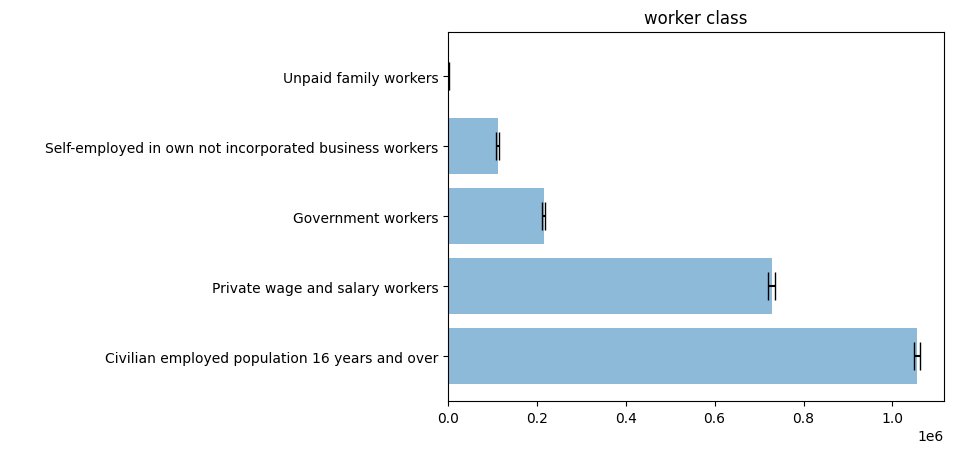

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

worker_class = econ_char_dict['CLASS OF WORKER']
labels = worker_class['Label (Grouping)']
estimates = worker_class['Estimate'].apply(lambda x: int(x.replace(',','')))
error = worker_class['Margin of Error'].apply(lambda x: int(x[1:].replace(',','')))
plt.barh(labels, estimates, xerr=error, alpha=0.5, ecolor='black', capsize=10)
plt.title('worker class')

In [7]:
econ_char_dict['COMMUTING TO WORK']

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
97894,Workers 16 years and over,COMMUTING TO WORK,Puerto Rico,"1,028,175","±7,485","1,028,175",(X),2021
97895,"Car, truck, or van -- drove alone",COMMUTING TO WORK,Puerto Rico,"854,276","±7,245",83.1%,±0.3,2021
97896,"Car, truck, or van -- carpooled",COMMUTING TO WORK,Puerto Rico,"74,052","±2,279",7.2%,±0.2,2021
97897,Public transportation (excluding taxicab),COMMUTING TO WORK,Puerto Rico,"13,698","±1,015",1.3%,±0.1,2021
97898,Walked,COMMUTING TO WORK,Puerto Rico,"25,891","±1,478",2.5%,±0.1,2021
97899,Other means,COMMUTING TO WORK,Puerto Rico,"17,311","±1,237",1.7%,±0.1,2021
97900,Worked from home,COMMUTING TO WORK,Puerto Rico,"42,947","±1,963",4.2%,±0.2,2021
97901,Mean travel time to work (minutes),COMMUTING TO WORK,Puerto Rico,28.6,±0.2,(X),(X),2021


Text(0.5, 1.0, 'commute')

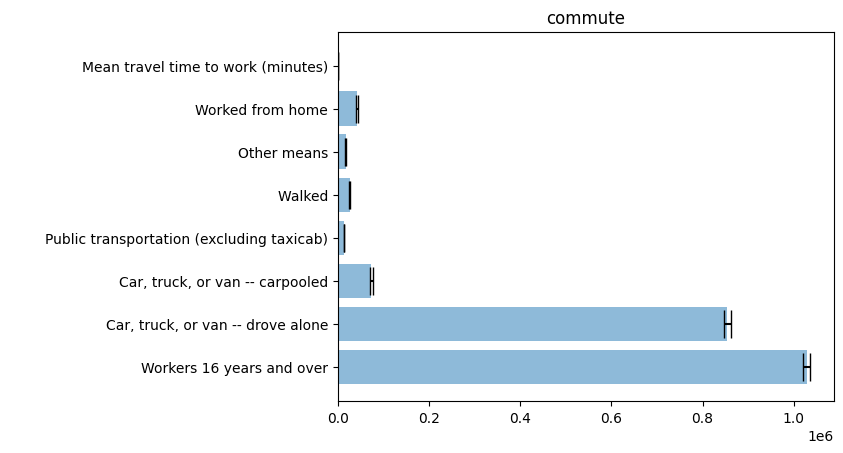

In [8]:

commute = econ_char_dict['COMMUTING TO WORK']
labels = commute['Label (Grouping)']
estimates = commute['Estimate'].apply(lambda x: float(x.replace(',','')))
error = commute['Margin of Error'].apply(lambda x: float(x[1:].replace(',','')))
plt.barh(labels, estimates, xerr=error, alpha=0.5, ecolor='black', capsize=10)
plt.title('commute')

In [9]:
econ_char_dict['EMPLOYMENT STATUS']


,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
97876,Population 16 years and over,EMPLOYMENT STATUS,Puerto Rico,"2,797,936","±1,321","2,797,936",(X),2021
97877,In labor force,EMPLOYMENT STATUS,Puerto Rico,"1,238,879","±6,162",44.3%,±0.2,2021
97878,Civilian labor force,EMPLOYMENT STATUS,Puerto Rico,"1,236,011","±6,101",44.2%,±0.2,2021
97879,Employed,EMPLOYMENT STATUS,Puerto Rico,"1,055,843","±7,087",37.7%,±0.3,2021
97880,Unemployed,EMPLOYMENT STATUS,Puerto Rico,"180,168","±4,347",6.4%,±0.2,2021
97881,Armed Forces,EMPLOYMENT STATUS,Puerto Rico,"2,868",±525,0.1%,±0.1,2021
97882,Not in labor force,EMPLOYMENT STATUS,Puerto Rico,"1,559,057","±6,220",55.7%,±0.2,2021
97883,Civilian labor force,EMPLOYMENT STATUS,Puerto Rico,"1,236,011","±6,101","1,236,011",(X),2021
97884,Unemployment Rate,EMPLOYMENT STATUS,Puerto Rico,(X),(X),14.6%,±0.4,2021
97885,Females 16 years and over,EMPLOYMENT STATUS,Puerto Rico,"1,486,792",±978,"1,486,792",(X),2021


<BarContainer object of 17 artists>

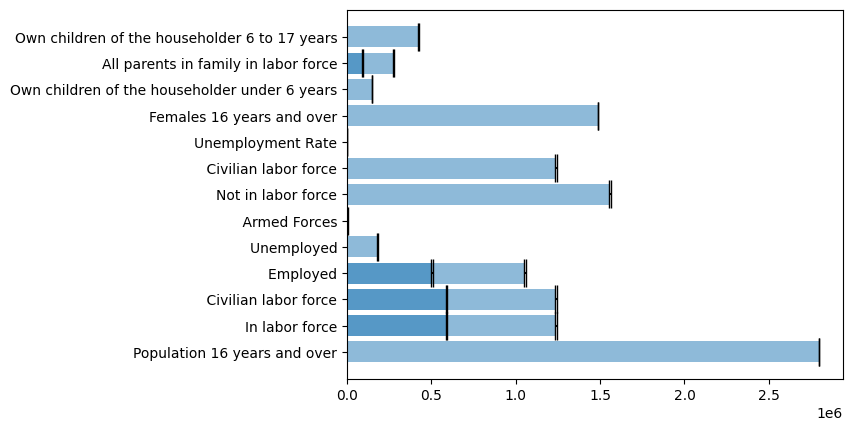

In [10]:
employment = econ_char_dict['EMPLOYMENT STATUS']
labels = employment['Label (Grouping)']
estimates = employment['Estimate'].apply(lambda x: 0 if x =='(X)' else float(x.replace(',','')))
error = employment['Margin of Error'].apply(lambda x:  0 if x =='(X)' else float(x[1:].replace(',','')))
plt.barh(labels, estimates, xerr=error, alpha=0.5, ecolor='black', capsize=10)

In [11]:
econ_char_dict['PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL']

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
98001,All families,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),39.2%,±0.4,2021
98002,With related children of the householder under...,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),52.2%,±0.6,2021
98003,With related children of the householder under...,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),53.4%,±1.7,2021
98004,Married couple families,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),26.7%,±0.5,2021
98005,With related children of the householder under...,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),29.5%,±1.0,2021
98006,With related children of the householder under...,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),28.4%,±2.8,2021
98007,"Families with female householder, no s...",PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),56.8%,±0.7,2021
98008,With related children of the householder under...,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),70.5%,±1.1,2021
98009,With related children of the householder under...,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),72.6%,±3.0,2021
98010,All people,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,Puerto Rico,(X),(X),42.7%,±0.4,2021


Text(0.5, 1.0, 'poverty')

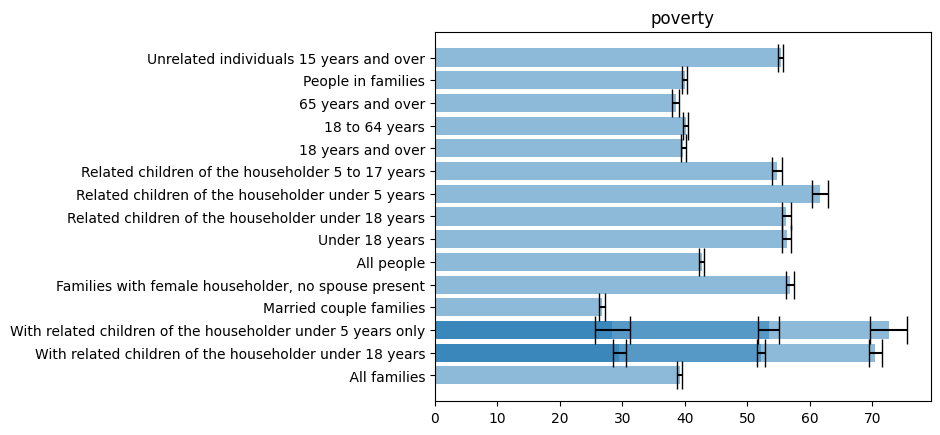

In [12]:
poverty = econ_char_dict['PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL']
labels = poverty['Label (Grouping)']
percents = poverty['Percent'].apply(lambda x: 0 if x =='(X)' else float(x.replace('%','')))
error = poverty['Percent Margin of Error'].apply(lambda x: 0 if x =='(X)' else float(x[1:].replace('%','')))
plt.barh(labels, percents, xerr=error, alpha=0.5, ecolor='black', capsize=10)
plt.title('poverty')

In [13]:
econ_char_dict['INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS)']

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
7451,Total households,INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Puerto Rico,"1,227,039","±3,433","1,227,039",(X),2010
7452,"Less than $10,000",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Puerto Rico,"365,814","±3,263",29.8%,±0.3,2010
7453,"$10,000 to $14,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Puerto Rico,"154,268","±2,124",12.6%,±0.2,2010
7454,"$15,000 to $24,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Puerto Rico,"217,075","±2,471",17.7%,±0.2,2010
7455,"$25,000 to $34,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Puerto Rico,"150,384","±2,069",12.3%,±0.2,2010
7456,"$35,000 to $49,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Puerto Rico,"141,638","±2,279",11.5%,±0.2,2010
7457,"$50,000 to $74,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Puerto Rico,"112,088","±1,927",9.1%,±0.2,2010
7458,"$75,000 to $99,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Puerto Rico,"40,946","±1,303",3.3%,±0.1,2010
7459,"$100,000 to $149,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Puerto Rico,"28,945","±1,026",2.4%,±0.1,2010
7460,"$150,000 to $199,999",INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTE...,Puerto Rico,"7,723",±529,0.6%,±0.1,2010


# dataset on value of all commodities

split into multiple dfs for different commodities stored in a dictionary (all_comm_dict)


NOTE: Nan assumed to be corn (ignore if irrelevant)

number of pounds in one metric ton = 2204.663

cents in one dollar = 100


In [14]:
all_comm_filename = 'all_commodities.csv'
df = pd.read_csv(all_comm_filename)
df['Date-Time'] = pd.to_datetime(df['Date-Time'])
df['Unit'] = df['Unit'].fillna('Dollar per Metric Ton')
df['Commodity'] = df['Commodity'].fillna('Corn')
split = [d for _, d in df.groupby('Commodity')]
all_comm_dict = {}
for i in split:
  name = i['Commodity'].iloc[0]
  all_comm_dict[name] = i
cents = 100
pounds = 2204.663
all_comm_dict['Corn']['Value'] = (all_comm_dict['Corn']['Value'] * cents) / pounds

df


,Date-Time,Value,Unit,Commodity
0,2024-01-01,203.879130,Cents per Pound,Coffee
1,2023-12-01,210.310476,Cents per Pound,Coffee
2,2023-11-01,197.433182,Cents per Pound,Coffee
3,2023-10-01,183.951364,Cents per Pound,Coffee
4,2023-09-01,183.589048,Cents per Pound,Coffee
...,...,...,...,...
1222,1990-05-01,14.619999,Cents per Pound,Sugar
1223,1990-04-01,15.240002,Cents per Pound,Sugar
1224,1990-03-01,15.310001,Cents per Pound,Sugar
1225,1990-02-01,14.650002,Cents per Pound,Sugar


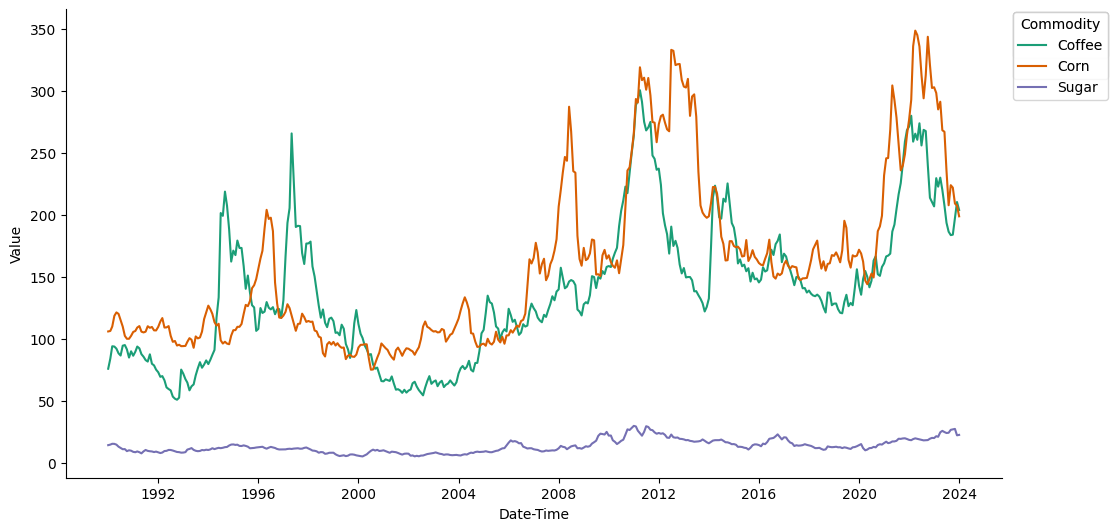

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date-Time']
  ys = series['Value']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date-Time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Commodity')):
  _plot_series(series, series_name, i)
  fig.legend(title='Commodity', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date-Time')
_ = plt.ylabel('Value')

# nutrition physical activity & obesity



In [16]:
# split df based on unique values in column with column_name
def split_df(df, column_name):
  return [d for _, d in df.groupby(column_name)]

# store split df into dict
def split_to_dict(split, column_name):
  d = {}
  for i in split:
    name = i[column_name].iloc[0]
    d[name] = i
  return d

# print unique values of column (keys in dict)
def print_types(d):
  for key, value in d.items():
    print(key)

def section_data(df, column_name):
  split = split_df(df, column_name)
  res = split_to_dict(split, column_name)

  return res

def num_of_dval(d):
  for key, value in d.items():
    print(key, len([item for item in value if item]))

In [59]:
nutrition_filename = 'Nutrition_Physical_Activity_and_Obesity_Data.csv'
df = pd.read_csv(nutrition_filename)
classes_dict = section_data(df, 'Class')
strat_dict = section_data(df, 'StratificationCategoryId1')
df

<ipython-input-59-e7c8fdadd64b>:2: DtypeWarning: Columns (18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(nutrition_filename)


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2019,2019,AK,Alaska,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who achieve...,NaN,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q048,VALUE,2,Race/Ethnicity,Asian,RACE,RACEASN
1,2019,2019,AZ,Arizona,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,NaN,Value,...,"(34.86597028, -111.763811277)",OWS,OWS1,Q038,VALUE,4,Total,Total,OVR,OVERALL
2,2019,2019,DC,District of Columbia,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,NaN,Value,...,"(38.890371385, -77.031961127)",OWS,OWS1,Q038,VALUE,11,Total,Total,OVR,OVERALL
3,2019,2019,IL,Illinois,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who partici...,NaN,Value,...,"(40.485010283, -88.997710178)",PA,PA1,Q049,VALUE,17,Grade,10th,GRADE,GRADE10
4,2019,2019,MD,Maryland,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,NaN,Value,...,"(39.290580964, -76.609260111)",OWS,OWS1,Q039,VALUE,24,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133340,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,VALUE,56,Income,"Less than $15,000",INC,INCLESS15
133341,2022,2022,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Education,Less than high school,EDU,EDUHS
133342,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,VALUE,56,Age (years),35 - 44,AGEYR,AGEYR3544
133343,2022,2022,WY,Wyoming,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,VALUE,56,Income,"$35,000 - $49,999",INC,INC3550


In [18]:


fnv = classes_dict['Fruits and Vegetables']
split = split_df(fnv,'Question')
fnv_questions = split_to_dict(split, 'Question')

print_types(fnv_questions)


Percent of adults who report consuming fruit less than one time daily
Percent of adults who report consuming vegetables less than one time daily
Percent of students in grades 9-12 who consume fruit less than 1 time daily
Percent of students in grades 9-12 who consume vegetables less than 1 time daily


In [19]:
less_than_one_fruit = fnv_questions['Percent of adults who report consuming fruit less than one time daily']
split = split_df(less_than_one_fruit, 'StratificationCategoryId1')
strat = split_to_dict(split, 'StratificationCategoryId1')
print_types(strat)

tmp = section_data(df, 'StratificationCategory1')



AGEYR
EDU
GEN
INC
OVR
RACE


In [20]:
migration = '10-22-filled.csv'
mig_df = pd.read_csv(migration)

mig_df = mig_df.dropna()
mig_df


,Unnamed: 0,To,From,Value,Year,Type
1,1,Alaska,Alabama,477.0,2010,Estimate
2,2,Arizona,Alabama,416.0,2010,Estimate
3,3,Arkansas,Alabama,1405.0,2010,Estimate
4,4,California,Alabama,3364.0,2010,Estimate
5,5,Colorado,Alabama,954.0,2010,Estimate
...,...,...,...,...,...,...
70299,70299,Washington,Abroad,6814.0,2022,MOE
70300,70300,West Virginia,Abroad,835.0,2022,MOE
70301,70301,Wisconsin,Abroad,3475.0,2022,MOE
70302,70302,Wyoming,Abroad,723.0,2022,MOE


In [21]:
neighboring_states = {
  "Alabama": ["Florida", "Georgia", "Mississippi", "Tennessee"],
  "Alaska": [],
  "Arizona": ["California", "Colorado", "Nevada", "New Mexico", "Utah"],
  "Arkansas": ["Louisiana", "Mississippi", "Missouri", "Oklahoma", "Tennessee", "Texas"],
  "California": ["Arizona", "Nevada", "Oregon"],
  "Colorado": ["Arizona", "Kansas", "Nebraska", "New Mexico", "Oklahoma", "Utah", "Wyoming"],
  "Connecticut": ["Massachusetts", "New York", "Rhode Island"],
  "Delaware": ["Maryland", "New Jersey", "Pennsylvania"],
  "Florida": ["Alabama", "Georgia"],
  "Georgia": ["Alabama", "Florida", "North Carolina", "South Carolina", "Tennessee"],
  "Hawaii": [],
  "Idaho": ["Montana", "Nevada", "Oregon", "Utah", "Washington", "Wyoming"],
  "Illinois": ["Indiana", "Iowa", "Michigan", "Kentucky", "Missouri", "Wisconsin"],
  "Indiana": ["Illinois", "Kentucky", "Michigan", "Ohio"],
  "Iowa": ["Illinois", "Minnesota", "Missouri", "Nebraska", "South Dakota", "Wisconsin"],
  "Kansas": ["Colorado", "Missouri", "Nebraska", "Oklahoma"],
  "Kentucky": ["Illinois", "Indiana", "Missouri", "Ohio", "Tennessee", "Virginia", "West Virginia"],
  "Louisiana": ["Arkansas", "Mississippi", "Texas"],
  "Maine": ["New Hampshire"],
  "Maryland": ["Delaware", "Pennsylvania", "Virginia", "West Virginia"],
  "Massachusetts": ["Connecticut", "New Hampshire", "New York", "Rhode Island", "Vermont"],
  "Michigan": ["Illinois", "Indiana", "Ohio", "Wisconsin"],
  "Minnesota": ["Iowa", "North Dakota", "South Dakota", "Wisconsin"],
  "Mississippi": ["Alabama", "Arkansas", "Louisiana", "Tennessee"],
  "Missouri": ["Arkansas", "Illinois", "Iowa", "Kansas", "Kentucky", "Nebraska", "Oklahoma", "Tennessee"],
  "Montana": ["Idaho", "North Dakota", "South Dakota", "Wyoming"],
  "Nebraska": ["Colorado", "Iowa", "Kansas", "Missouri", "South Dakota", "Wyoming"],
  "Nevada": ["Arizona", "California", "Idaho", "Oregon", "Utah"],
  "New Hampshire": ["Maine", "Massachusetts", "Vermont"],
  "New Jersey": ["Delaware", "New York", "Pennsylvania"],
  "New Mexico": ["Arizona", "Colorado", "Oklahoma", "Texas"],
  "New York": ["Connecticut", "Massachusetts", "New Jersey", "Pennsylvania", "Rhode Island", "Vermont"],
  "North Carolina": ["Georgia", "South Carolina", "Tennessee", "Virginia"],
  "North Dakota": ["Minnesota", "Montana", "South Dakota"],
  "Ohio": ["Indiana", "Kentucky", "Michigan", "Pennsylvania", "West Virginia"],
  "Oklahoma": ["Arkansas", "Colorado", "Kansas", "Missouri", "New Mexico", "Texas"],
  "Oregon": ["California", "Idaho", "Nevada", "Washington"],
  "Pennsylvania": ["Delaware", "Maryland", "New Jersey", "New York", "Ohio", "West Virginia"],
  "Rhode Island": ["Connecticut", "Massachusetts", "New York"],
  "South Carolina": ["Georgia", "North Carolina"],
  "South Dakota": ["Iowa", "Minnesota", "Montana", "Nebraska", "North Dakota", "Wyoming"],
  "Tennessee": ["Alabama", "Arkansas", "Georgia", "Kentucky", "Mississippi", "Missouri", "North Carolina", "Virginia"],
  "Texas": ["Arkansas", "Louisiana", "New Mexico", "Oklahoma"],
  "Utah": ["Arizona", "Colorado", "Idaho", "Nevada", "Wyoming"],
  "Vermont": ["Massachusetts", "New Hampshire", "New York"],
  "Virginia": ["Kentucky", "Maryland", "North Carolina", "Tennessee", "West Virginia"],
  "Washington": ["Idaho", "Oregon"],
  "West Virginia": ["Kentucky", "Maryland", "Ohio", "Pennsylvania", "Virginia"],
  "Wisconsin": ["Illinois", "Iowa", "Michigan", "Minnesota"],
  "Wyoming": ["Colorado", "Idaho", "Montana", "Nebraska", "South Dakota", "Utah"]
}

In [22]:
def filter_migration(migration_df):
    filtered_records = []
    for index, row in migration_df.iterrows():
        origin = row['From']
        destination = row['To']
        if destination in neighboring_states.get(origin, []):
            filtered_records.append(row)
    return pd.DataFrame(filtered_records)

    YearStart    Value
0        2010  38246.0
1        2011  42569.0
2        2012  37749.0
3        2013  43949.0
4        2014  47853.0
5        2015  45655.0
6        2016  52136.0
7        2017  44793.0
8        2018  37533.0
9        2019  45492.0
10       2020  33388.0
11       2021  33388.0
12       2022  46799.0


<ipython-input-66-e36f74cee372>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_cal_mig = cal_mig.groupby(['Year'], as_index=False).sum()


<BarContainer object of 13 artists>

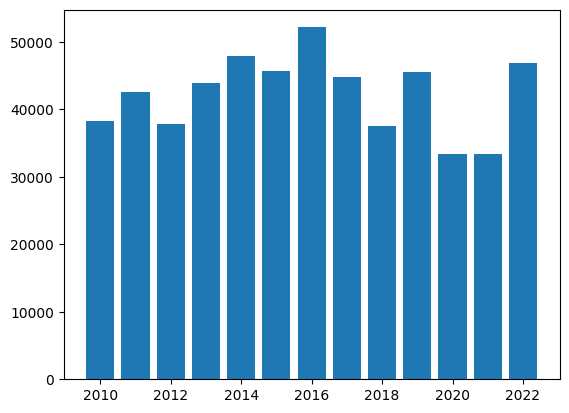

In [66]:

filtered_migration_df = mig_df[(mig_df["From"] == "Abroad") & (mig_df["Type"] =="Estimate")]
loc_mig = section_data(filtered_migration_df, 'To')
cal_mig = loc_mig['Arizona'].drop(['To'], axis=1)
cal_mig['Value'] = cal_mig['Value'].apply(lambda x: float(x.replace(',','').replace('+/- ','')))
new_cal_mig = cal_mig.groupby(['Year'], as_index=False).sum()
new_cal_mig.rename(columns={'Year': 'YearStart'}, inplace=True)
new_cal_mig.drop(['Unnamed: 0'], axis=1, inplace=True)
print(new_cal_mig)
plt.bar(new_cal_mig['YearStart'], new_cal_mig['Value'])

In [67]:

loc_dict = section_data(df, 'LocationDesc')
cal = section_data(loc_dict['Arizona'], 'StratificationCategoryId1')
overall_cal = cal['OVR']
overall_cal

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
1,2019,2019,AZ,Arizona,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,NaN,Value,...,"(34.86597028, -111.763811277)",OWS,OWS1,Q038,VALUE,4,Total,Total,OVR,OVERALL
1032,2019,2019,AZ,Arizona,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who achieve...,NaN,Value,...,"(34.86597028, -111.763811277)",PA,PA1,Q048,VALUE,4,Total,Total,OVR,OVERALL
2560,2005,2005,AZ,Arizona,Youth Risk Behavior Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of students in grades 9-12 who consume...,NaN,Value,...,"(34.86597028, -111.763811277)",FV,FV1,Q020,VALUE,4,Total,Total,OVR,OVERALL
2618,2019,2019,AZ,Arizona,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who partici...,NaN,Value,...,"(34.86597028, -111.763811277)",PA,PA1,Q049,VALUE,4,Total,Total,OVR,OVERALL
3058,2015,2015,AZ,Arizona,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who achieve...,NaN,Value,...,"(34.86597028, -111.763811277)",PA,PA1,Q048,VALUE,4,Total,Total,OVR,OVERALL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126948,2021,2021,AZ,Arizona,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,NaN,Value,...,"(34.865970280000454, -111.76381127699972)",FV,FV1,Q018,VALUE,4,Total,Total,OVR,OVERALL
128010,2021,2021,AZ,Arizona,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,NaN,Value,...,"(34.865970280000454, -111.76381127699972)",FV,FV1,Q019,VALUE,4,Total,Total,OVR,OVERALL
129120,2022,2022,AZ,Arizona,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(34.865970280000454, -111.76381127699972)",OWS,OWS1,Q037,VALUE,4,Total,Total,OVR,OVERALL
129144,2022,2022,AZ,Arizona,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(34.865970280000454, -111.76381127699972)",PA,PA1,Q047,VALUE,4,Total,Total,OVR,OVERALL


In [25]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    result = pd.Series(dftest[0:4], index=['Test Statistic','P-value','Lags Used','No of Observations'])
    for key,value in dftest[4].items():
        result['Critical Value (%s)'%key] = value
    return result


In [26]:
from scipy import signal
def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))
    c = np.correlate(p, q, 'full')
    return c


In [27]:
def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label='5% confidence interval')
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1,
    linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1,
    linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correlation', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold',
    fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()

In [28]:
def get_corr(d, class_name):
  for key, val in d.items():
    print(key)
    loc = section_data(loc_dict[key], 'StratificationCategoryId1')
    overall_loc = loc['OVR']
    overall_loc_class_dict = section_data(overall_loc, 'Class')
    obesity_loc = overall_loc_class_dict['Obesity / Weight Status']
    obesity_qn = section_data(obesity_loc, 'Question')['Percent of adults aged 18 years and older who have obesity'][['YearStart', 'Data_Value']]
    overall_loc_class_dict.pop('Obesity / Weight Status')
    # print(k)
    loc_qn_dict = section_data(overall_loc_class_dict[class_name], 'Question')
    for qn, data in loc_qn_dict.items():
      print(qn)
      tmp = data[['YearStart', 'Data_Value']]
      new_df = pd.merge(obesity_qn, tmp, on='YearStart')
      new_df = new_df.drop('YearStart', axis=1)
      fig = plt.figure(figsize = (8, 6))
      sns.regplot(data = new_df, x = 'Data_Value_x', y ='Data_Value_y')
      plt.title('Obesity vs. ' + class_name, weight='bold', fontsize = 15)
      plt.ylabel('Obesity', weight='bold', fontsize = 12)
      plt.xlabel(class_name, weight='bold', fontsize = 12)
      res = ccf_values(new_df['Data_Value_x'], new_df['Data_Value_y'])
      print(res)
      lags = signal.correlation_lags(len(new_df['Data_Value_x']), len(new_df['Data_Value_y']))
      ccf_plot(lags, res)
      plt.show()

In [68]:
cal_qn_dict = section_data(overall_cal, 'Question')
cal_obesity = cal_qn_dict['Percent of adults aged 18 years and older who have obesity'][['YearStart', 'Data_Value']]
cal_obesity

,YearStart,Data_Value
41908,2018,29.5
46914,2020,30.9
71184,2017,29.5
75748,2013,26.8
82258,2012,26.0
84444,2019,31.4
94631,2014,28.9
101905,2011,25.1
106928,2015,28.4
120334,2016,29.0


In [30]:
cal_phys = cal_qn_dict['Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'][['YearStart', 'Data_Value']]
cal_phys

,YearStart,Data_Value
50955,2017,54.8
80524,2011,57.2
83244,2019,57.4
89107,2015,55.3
104959,2013,53.9


In [69]:
new_df = pd.merge(cal_obesity, new_cal_mig, on='YearStart')
new_df = new_df.drop('YearStart', axis=1)
print(new_df)
new_df.apply(adf_test, axis=0)

    Data_Value    Value
0         29.5  37533.0
1         30.9  33388.0
2         29.5  44793.0
3         26.8  43949.0
4         26.0  37749.0
5         31.4  45492.0
6         28.9  47853.0
7         25.1  42569.0
8         28.4  45655.0
9         29.0  52136.0
10        31.3  33388.0
11        33.2  46799.0


,Data_Value,Value
Test Statistic,-1.864832,0.502978
P-value,0.348782,0.984963
Lags Used,0.000000,4.000000
No of Observations,11.000000,7.000000
Critical Value (1%),-4.223238,-4.938690
Critical Value (5%),-3.189369,-3.477583
Critical Value (10%),-2.729839,-2.843868


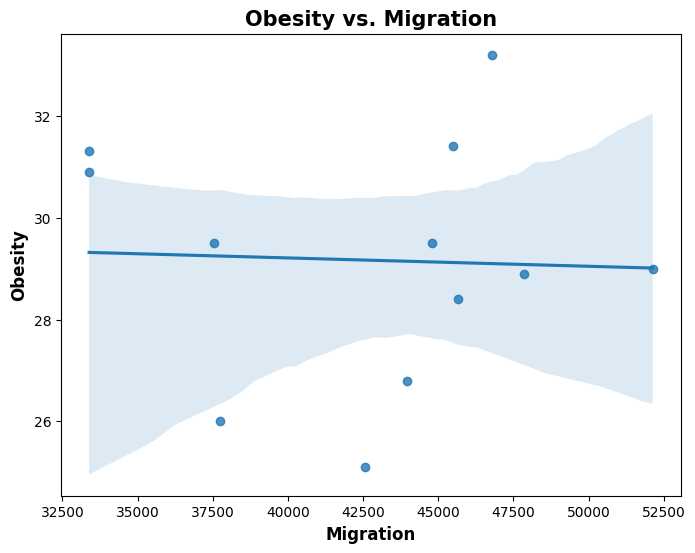

In [70]:
fig = plt.figure(figsize = (8, 6))
sns.regplot(data = new_df, x = 'Value', y ='Data_Value')
plt.title('Obesity vs. Migration', weight='bold', fontsize = 15)
plt.ylabel('Obesity', weight='bold', fontsize = 12)
plt.xlabel('Migration', weight='bold', fontsize = 12)
plt.show()

In [33]:
res = ccf_values(new_df['Value'], new_df['Data_Value'])
res

array([ 0.148442  ,  0.28005126, -0.0982928 , -0.38836451, -0.19272593,
       -0.3374437 ,  0.13754868,  0.32384609, -0.25512854, -0.06554528,
       -0.0010768 ,  0.63690299,  0.14065039, -0.0274717 ,  0.05688691,
       -0.36631617,  0.2326057 , -0.0213702 ,  0.00204757, -0.20096686,
       -0.01722279,  0.06622958, -0.05328589])

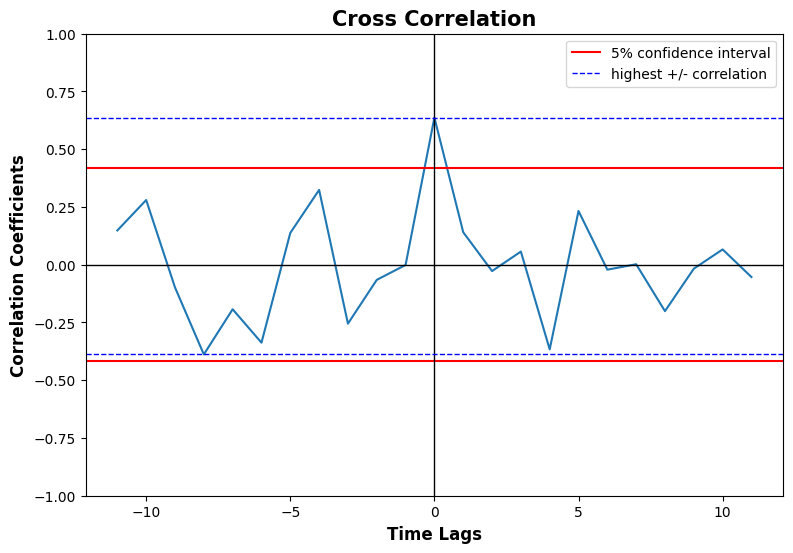

In [65]:
lags = signal.correlation_lags(len(new_df['Value']), len(new_df['Data_Value']))
ccf_plot(lags, res)

In [35]:
# get_combined_yearly_plot_by_loc(less_than_one_fruit, 'LocationDesc', 'va')

In [36]:
def plot_all_questions(df):
  classes_dict = section_data(df, 'Class')
  for key, val in classes_dict.items():
    class_df = classes_dict[key]
    class_dict = section_data(class_df, 'Question')
    for k, v in class_dict.items():
      qn_df = class_dict[k]
      get_combined_yearly_plot(qn_df, 'StratificationCategoryId1', 'Stratification1', k)

In [37]:
# plots graph of yearly values for each type in the stratification (i.e. race: asian, his, etc)
# strat_cat_name: name of category, strat_name: classes in category
def get_yearly_plot_of_strat(df, strat_cat_name, strat_name):
  split = section_data(df, strat_cat_name)
  for key, val in strat.items():
    strat_grp = strat[key]
    strat_grp_dict = section_data(strat_grp, strat_name)
    fig = plt.figure(figsize=(15, 12))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle(key, fontsize=18, y=0.95)
    subplot_count = 0
    for key, val in strat_grp_dict.items():
      new_df = val[['YearStart', 'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit']]
      new_df = new_df.dropna()
      new_df_yr = new_df.groupby('YearStart', as_index=False).mean()
      ax = plt.subplot(5, 5, subplot_count + 1)
      year = new_df_yr['YearStart']
      val = new_df_yr['Data_Value']
      low = new_df_yr['Low_Confidence_Limit']
      high = new_df_yr['High_Confidence_Limit']
      err = high - low
      ax.title.set_text(key)
      ax.bar(year, val, yerr=err, capsize=5)
      subplot_count += 1


In [38]:
# plots graph of yearly values for each type in the stratification (i.e. race: asian, his, etc)
# strat_cat_name: name of category, strat_name: classes in category
def get_combined_yearly_plot(df, strat_cat_name, strat_name, plot_title):
  strat_dict = section_data(df, strat_cat_name)
  fig, ax = plt.subplots(4, 2)

  fig.suptitle(plot_title, fontsize='25',y=1)

  fig.set_figwidth(25)
  fig.set_figheight(25)
  # ax.set_xlabel('Year')
  # ax.set_ylabel('Percent')
  subplot_x = 0
  subplot_y = 0

  # for each strat_cat
  for key, val in strat_dict.items():
    strat_grp = strat_dict[key]
    strat_grp_dict = section_data(strat_grp, strat_name)
    bar_count = 0
    width = 0.1
    bars = []
    titles = []

    # for each class in strat_cat
    for k,v in strat_grp_dict.items():
      new_df = v[['YearStart', 'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit']]
      new_df = new_df.dropna()
      new_df_yr = new_df.groupby('YearStart', as_index=False).mean()
      year = new_df_yr['YearStart']
      r = np.arange(len(year))
      data = new_df_yr['Data_Value']
      low = new_df_yr['Low_Confidence_Limit']
      high = new_df_yr['High_Confidence_Limit']
      err = high - low
      bar = ax[subplot_x, subplot_y].bar(r + (width * bar_count), data, width)
      bars.append(bar)
      titles.append(k)
      bar_count += 1

    fig.tight_layout()
    ax[subplot_x, subplot_y].set_title(key)

    ax[subplot_x, subplot_y].set_xticks(r+width, year)
    ax[subplot_x, subplot_y].legend(bars, titles, bbox_to_anchor=(1.01, 1), borderaxespad=0)
    subplot_y += 1
    if subplot_y == 2:
      subplot_x += 1
      subplot_y = 0


In [39]:
# plot_all_questions(loc_dict['California'])

In [40]:
# plot_all_questions(loc_dict['Arkansas'])

effectiveness of physcial activity in decreasing rate of obesity/being overwweight

In [41]:
newyork_filename = 'newyork_population_data.csv'
california_filename = 'california_population_data.csv'
kentucky_filename = 'kentucky_population_data.csv'
tennessee_filename = 'tennessee_population_data.csv'
arkansas_filename = 'arkansas_population_data.csv'



In [42]:
df = pd.read_csv(newyork_filename)

In [43]:
ny_income = df[47:50]
ny_income

,Fact,Fact Note,"New York city, New York","Value Note for New York city, New York"
47,"Median household income (in 2022 dollars), 201...",NaN,"$76,607",NaN
48,Per capita income in past 12 months (in 2022 d...,NaN,"$48,066",NaN
49,"Persons in poverty, percent",NaN,17.2%,NaN


<ipython-input-44-de96b78dc93b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_race_df['New York city, New York'] = new_race_df['New York city, New York'].apply(lambda x: float(x.replace('%','')))


<BarContainer object of 8 artists>

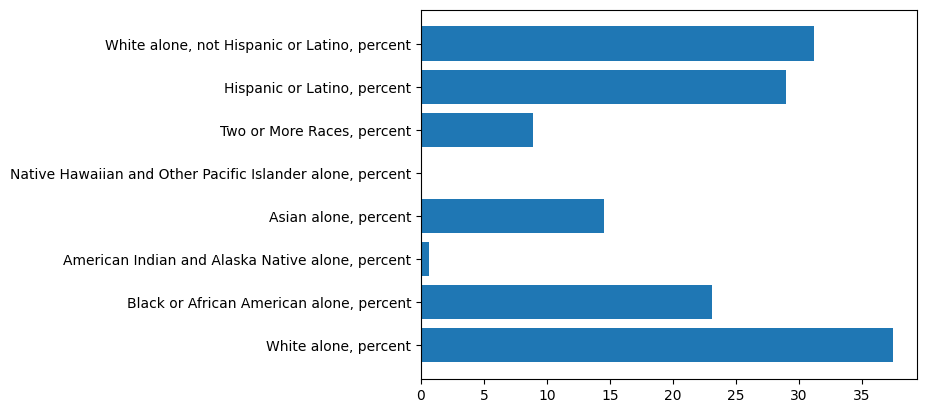

In [44]:
race = df[12:20]
new_race_df = race[['Fact', 'New York city, New York']]
new_race_df['New York city, New York'] = new_race_df['New York city, New York'].apply(lambda x: float(x.replace('%','')))
new_race_df
plt.barh(new_race_df['Fact'], new_race_df['New York city, New York'])


<ipython-input-45-52c63506167d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_education_df['New York city, New York'] = new_education_df['New York city, New York'].apply(lambda x: float(x.replace('%','')))


<BarContainer object of 2 artists>

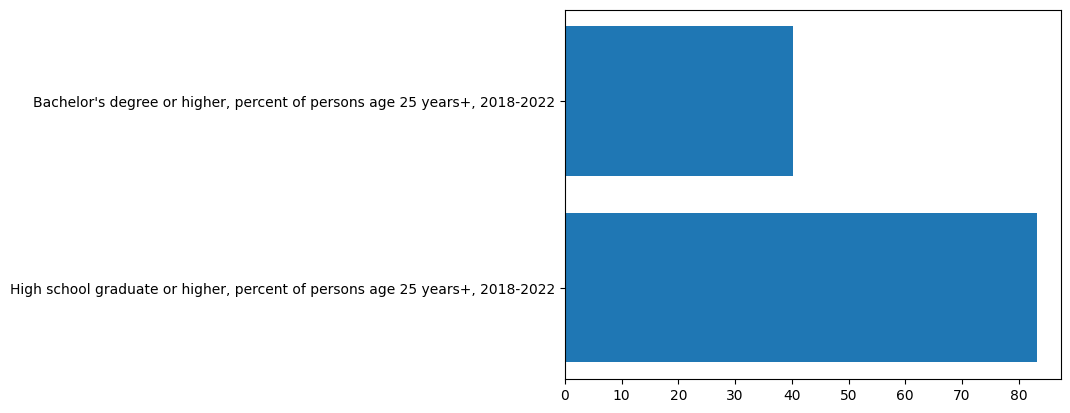

In [45]:
education = df[35:37]
new_education_df = education[['Fact', 'New York city, New York']]
new_education_df['New York city, New York'] = new_education_df['New York city, New York'].apply(lambda x: float(x.replace('%','')))
new_education_df
plt.barh(new_education_df['Fact'], new_education_df['New York city, New York'])

In [46]:
df = pd.read_csv(tennessee_filename)
df

,Fact,Fact Note,Tennessee,Value Note for Tennessee
0,"Population estimates, July 1, 2023, (V2023)",NaN,"7,126,489",NaN
1,"Population Estimates, July 1, 2022, (V2022)",NaN,"7,048,976",NaN
2,"Population estimates base, April 1, 2020, (V2023)",NaN,"6,910,786",NaN
3,"Population estimates base, April 1, 2020, (V2022)",NaN,"6,910,786",NaN
4,"Population, percent change - April 1, 2020 (es...",NaN,3.1%,NaN
...,...,...,...,...
83,FN,Footnote on this item in place of data,NaN,NaN
84,X,Not applicable,NaN,NaN
85,S,Suppressed; does not meet publication standards,NaN,NaN
86,NaN,Not available,NaN,NaN


In [47]:
t_income = df[47:50]
t_income

,Fact,Fact Note,Tennessee,Value Note for Tennessee
47,"Median household income (in 2022 dollars), 201...",NaN,"$64,035",NaN
48,Per capita income in past 12 months (in 2022 d...,NaN,"$36,040",NaN
49,"Persons in poverty, percent",NaN,13.3%,NaN


<ipython-input-48-965b06e80dee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_race_df['Tennessee'] = new_race_df['Tennessee'].apply(lambda x: float(x.replace('%','')))


<BarContainer object of 8 artists>

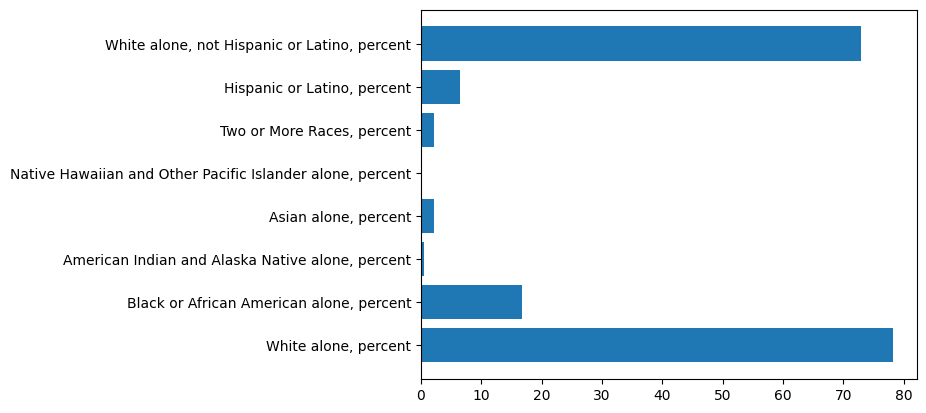

In [48]:
race = df[12:20]
new_race_df = race[['Fact', 'Tennessee']]
new_race_df['Tennessee'] = new_race_df['Tennessee'].apply(lambda x: float(x.replace('%','')))
new_race_df
plt.barh(new_race_df['Fact'], new_race_df['Tennessee'])


<ipython-input-49-6ae3aadd234f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_education_df['Tennessee'] = new_education_df['Tennessee'].apply(lambda x: float(x.replace('%','')))


<BarContainer object of 2 artists>

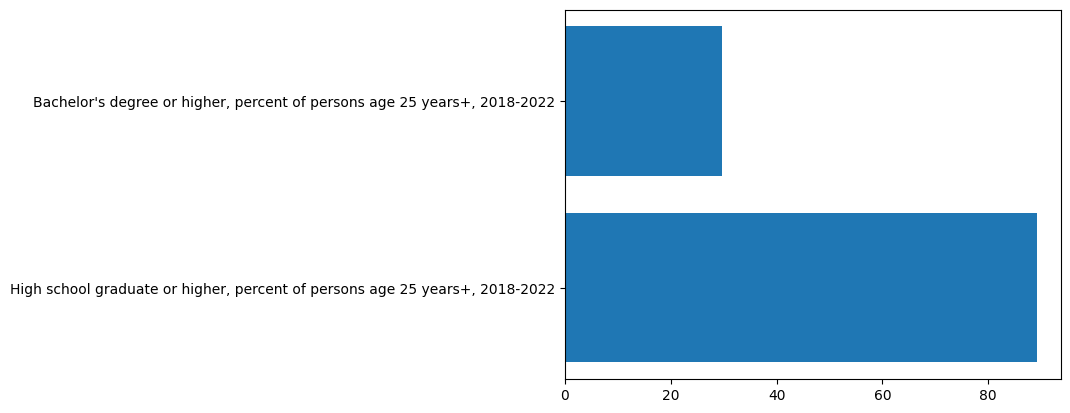

In [49]:
education = df[35:37]
new_education_df = education[['Fact', 'Tennessee']]
new_education_df['Tennessee'] = new_education_df['Tennessee'].apply(lambda x: float(x.replace('%','')))
new_education_df
plt.barh(new_education_df['Fact'], new_education_df['Tennessee'])

<ipython-input-50-32d014ad15ff>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_race_df['California'] = new_race_df['California'].apply(lambda x: float(x.replace('%','')))


,Fact,Fact Note,California,Value Note for California
47,"Median household income (in 2022 dollars), 201...",NaN,"$91,905",NaN
48,Per capita income in past 12 months (in 2022 d...,NaN,"$45,591",NaN
49,"Persons in poverty, percent",NaN,12.2%,NaN


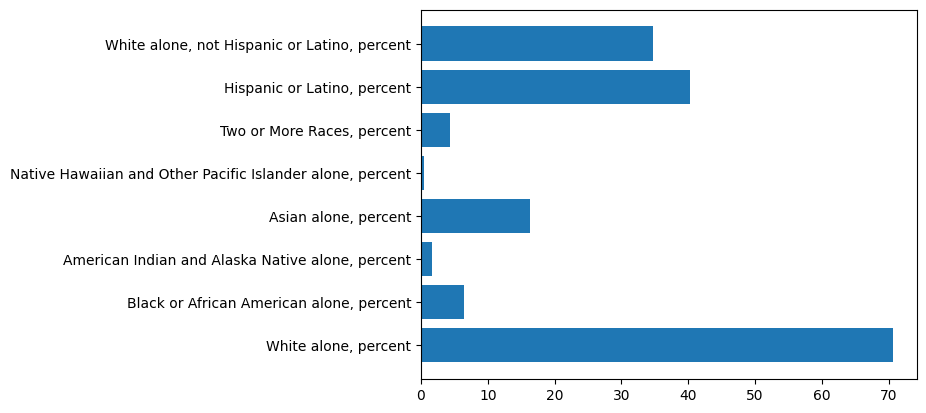

In [50]:
df = pd.read_csv(california_filename)
cal_income = df[47:50]

race = df[12:20]
new_race_df = race[['Fact', 'California']]
new_race_df['California'] = new_race_df['California'].apply(lambda x: float(x.replace('%','')))
new_race_df
plt.barh(new_race_df['Fact'], new_race_df['California'])
cal_income

<ipython-input-51-daffc264e798>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_education_df['California'] = new_education_df['California'].apply(lambda x: float(x.replace('%','')))


<BarContainer object of 2 artists>

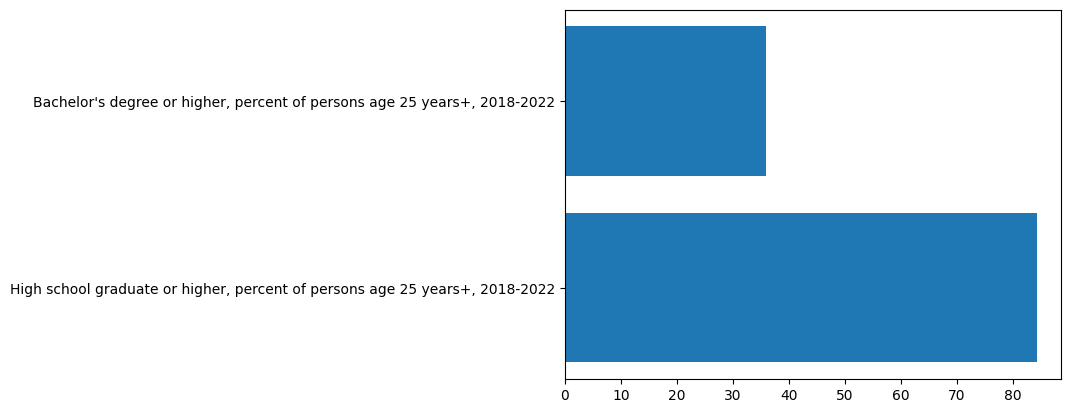

In [51]:
df = pd.read_csv(california_filename)
education = df[35:37]
new_education_df = education[['Fact', 'California']]
new_education_df['California'] = new_education_df['California'].apply(lambda x: float(x.replace('%','')))
plt.barh(new_education_df['Fact'], new_education_df['California'])

<ipython-input-52-afa3a01de42c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_race_df['Kentucky'] = new_race_df['Kentucky'].apply(lambda x: float(x.replace('%','')))


,Fact,Fact Note,Kentucky,Value Note for Kentucky
47,"Median household income (in 2022 dollars), 201...",NaN,"$60,183",NaN
48,Per capita income in past 12 months (in 2022 d...,NaN,"$33,515",NaN
49,"Persons in poverty, percent",NaN,16.5%,NaN


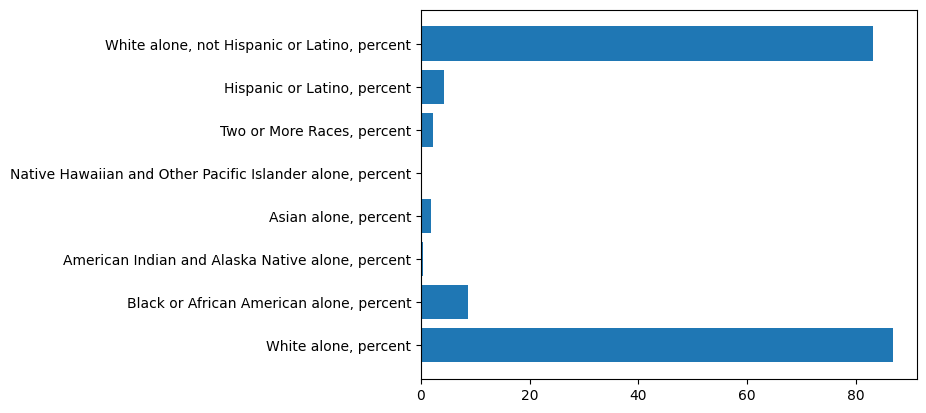

In [52]:
df = pd.read_csv(kentucky_filename)
ken_income = df[47:50]
race = df[12:20]
new_race_df = race[['Fact', 'Kentucky']]
new_race_df['Kentucky'] = new_race_df['Kentucky'].apply(lambda x: float(x.replace('%','')))
new_race_df
plt.barh(new_race_df['Fact'], new_race_df['Kentucky'])
ken_income

<ipython-input-53-07ab6cbf0e34>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_education_df['Kentucky'] = new_education_df['Kentucky'].apply(lambda x: float(x.replace('%','')))


<BarContainer object of 2 artists>

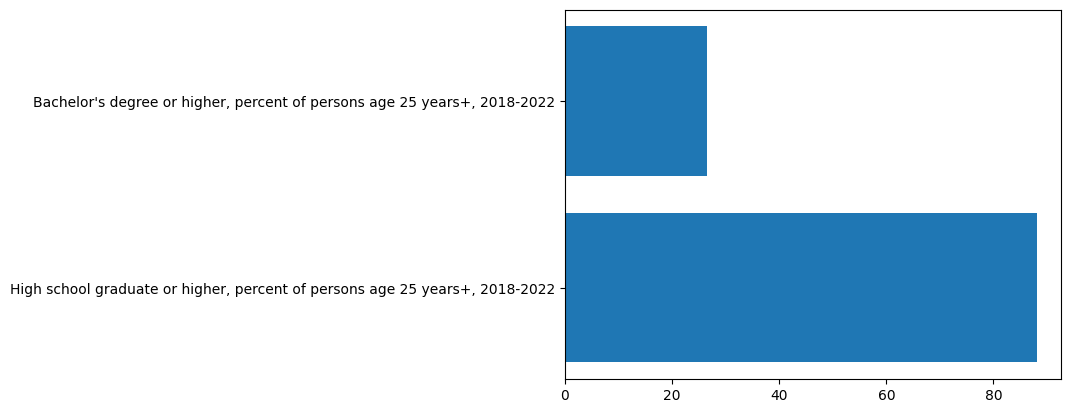

In [53]:
df = pd.read_csv(kentucky_filename)
education = df[35:37]
new_education_df = education[['Fact', 'Kentucky']]
new_education_df['Kentucky'] = new_education_df['Kentucky'].apply(lambda x: float(x.replace('%','')))
plt.barh(new_education_df['Fact'], new_education_df['Kentucky'])

<ipython-input-54-06f3c9fb8b61>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_race_df['Arkansas'] = new_race_df['Arkansas'].apply(lambda x: float(x.replace('%','')))


,Fact,Fact Note,Arkansas,Value Note for Arkansas
47,"Median household income (in 2022 dollars), 201...",NaN,"$56,335",NaN
48,Per capita income in past 12 months (in 2022 d...,NaN,"$31,868",NaN
49,"Persons in poverty, percent",NaN,16.8%,NaN


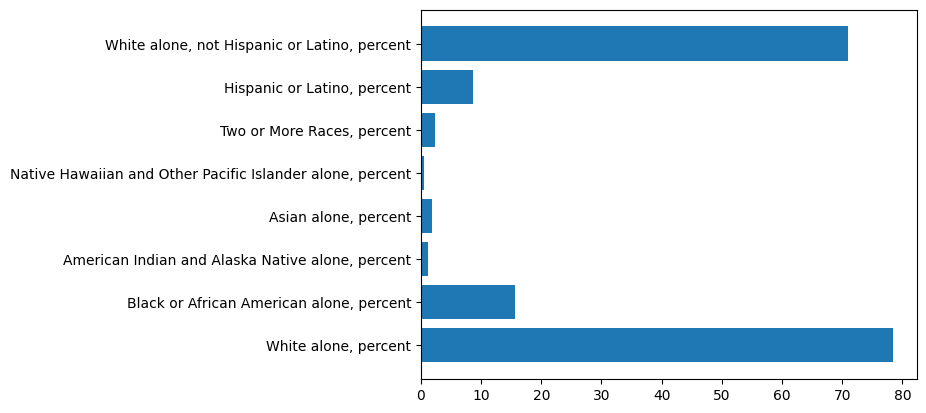

In [54]:
df = pd.read_csv(arkansas_filename)
ark_income = df[47:50]
race = df[12:20]
new_race_df = race[['Fact', 'Arkansas']]
new_race_df['Arkansas'] = new_race_df['Arkansas'].apply(lambda x: float(x.replace('%','')))
new_race_df
plt.barh(new_race_df['Fact'], new_race_df['Arkansas'])
ark_income

<ipython-input-55-44fdf78c493c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_education_df['Arkansas'] = new_education_df['Arkansas'].apply(lambda x: float(x.replace('%','')))


<BarContainer object of 2 artists>

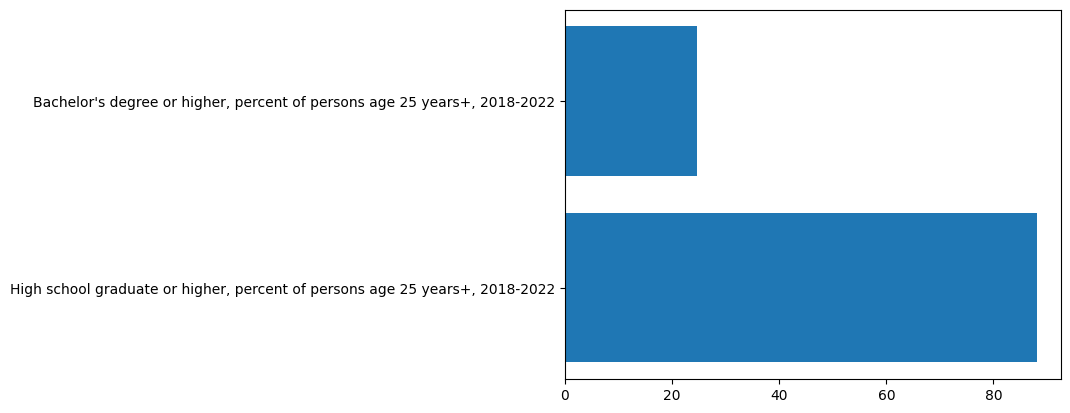

In [55]:
df = pd.read_csv(arkansas_filename)
education = df[35:37]
new_education_df = education[['Fact', 'Arkansas']]
new_education_df['Arkansas'] = new_education_df['Arkansas'].apply(lambda x: float(x.replace('%','')))
plt.barh(new_education_df['Fact'], new_education_df['Arkansas'])